<a href="https://colab.research.google.com/github/KamiraPagulayan/CCDATSCL_PROJECT_COM221/blob/main/DataScience_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

# Dataset

In [ ]:
file_path = "/content/Personal_Expense_Data.xlsx"
df = pd.read_excel(file_path)

df.head()

,Date,Expense_Category,Amount,Expense_Type,Day_Category
0,2025-01-06 00:00:00,NaN,0,NaN,Weekend
1,2025-02-06 00:00:00,NaN,0,NaN,Weekday
2,2025-03-06 00:00:00,NaN,0,NaN,Weekday
3,2025-04-06 00:00:00,NaN,0,NaN,Weekday
4,2025-05-06 00:00:00,Transportation,53,Need,Weekday


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              179 non-null    object
 1   Expense_Category  125 non-null    object
 2   Amount            179 non-null    int64 
 3   Expense_Type      125 non-null    object
 4   Day_Category      179 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.1+ KB


In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Drop missing values
df = df.dropna()

# Ensure Amount is numeric
df['Amount'] = pd.to_numeric(df['Amount'])

In [ ]:
df.head()

,Date,Expense_Category,Amount,Expense_Type,Day_Category
4,2025-05-06,Transportation,53,Need,Weekday
5,2025-05-06,Food,45,Need,Weekday
6,2025-05-06,Haircut,255,Need,Weekday
9,2025-08-06,Transportation,108,Need,Weekend
10,2025-08-06,Grocery,578,Need,Weekend


# Temporal Variables


In [ ]:
# Day type
df['Day'] = df['Date'].dt.day_name()

df['Day_Category'] = df['Day'].apply(
    lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday'
)

df.head()

,Date,Expense_Category,Amount,Expense_Type,Day_Category,Day
4,2025-05-06,Transportation,53,Need,Weekday,Tuesday
5,2025-05-06,Food,45,Need,Weekday,Tuesday
6,2025-05-06,Haircut,255,Need,Weekday,Tuesday
9,2025-08-06,Transportation,108,Need,Weekday,Wednesday
10,2025-08-06,Grocery,578,Need,Weekday,Wednesday


# **RESEARCH QUESTION 1**

How do statistical spending patterns differ between needs-based and wants-based expenses?

# Descriptive Analysis

In [ ]:
df['Expense_Type'].value_counts()

,count
Expense_Type,
Need,112
Want,13


In [ ]:
df.groupby('Expense_Type')['Amount'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    min='min',
    max='max',
    sum='sum'
)

,count,mean,median,std,min,max,sum
Expense_Type,,,,,,,
Need,112,150.928571,105.0,138.272854,10,603,16904
Want,13,208.923077,89.0,285.612634,39,928,2716


# Visualization

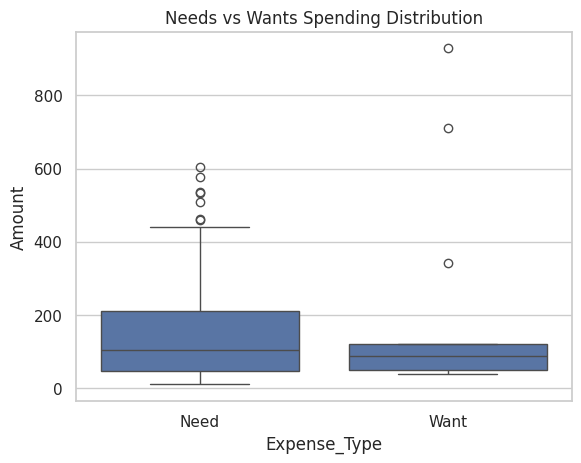

In [ ]:
sns.boxplot(x='Expense_Type', y='Amount', data=df)
plt.title("Needs vs Wants Spending Distribution")
plt.show()

# Statistical Test → Mann-Whitney U

In [ ]:
from scipy.stats import mannwhitneyu

needs = df[df['Expense_Type'] == 'Need']['Amount']
wants = df[df['Expense_Type'] == 'Want']['Amount']

u_stat, p_val = mannwhitneyu(needs, wants, alternative='two-sided')
u_stat, p_val

(np.float64(735.5), np.float64(0.9548446233312419))

# **RESEARCH QUESTION 2**

What temporal patterns can be identified in spending behavior when comparing weekdays and weekends?

# Mean Spending Comparison

In [ ]:
temporal_stats = df.groupby('Day_Category')['Amount'].agg(
    ['mean', 'median', 'std', 'sum']
)

temporal_stats

,mean,median,std,sum
Day_Category,,,,
Weekday,147.436782,99.0,155.854039,12827
Weekend,178.763158,113.5,166.472696,6793


# Visualization

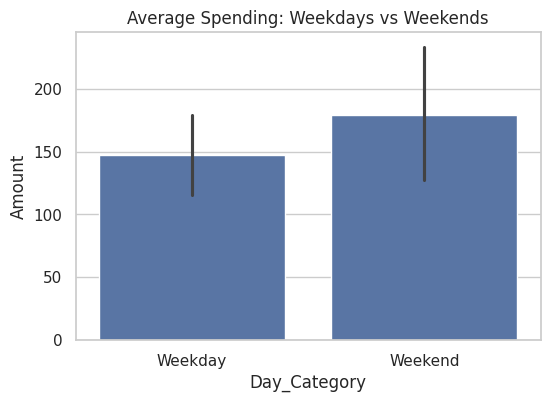

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x='Day_Category', y='Amount', data=df, estimator=np.mean)
plt.title("Average Spending: Weekdays vs Weekends")
plt.show()

# Statistical Test

In [ ]:
weekday = df[df['Day_Category'] == 'Weekday']['Amount']
weekend = df[df['Day_Category'] == 'Weekend']['Amount']

t_stat, p_val = stats.ttest_ind(weekday, weekend, equal_var=False)

t_stat, p_val

(np.float64(-0.9864461344331928), np.float64(0.32748684364357994))

# **RESEARCH QUESTION 3**

Which expense categories show the highest contribution and variability in total spending?

# Category Contribution

In [ ]:
category_summary = df.groupby('Expense_Category')['Amount'].agg(
    ['sum', 'mean', 'std']
).sort_values(by='sum', ascending=False)

category_summary

,sum,mean,std
Expense_Category,,,
Food,10673,187.245614,140.186773
Transportation,4123,93.704545,89.207774
Staycation,1270,635.000000,414.364574
Grocery,1181,590.500000,17.677670
Ticket,712,712.000000,NaN
Haircut,605,201.666667,52.519838
Load,277,55.400000,29.228411
Shopee Order,214,71.333333,28.041636
Computer Shop,200,50.000000,0.000000


# Contribution Plot

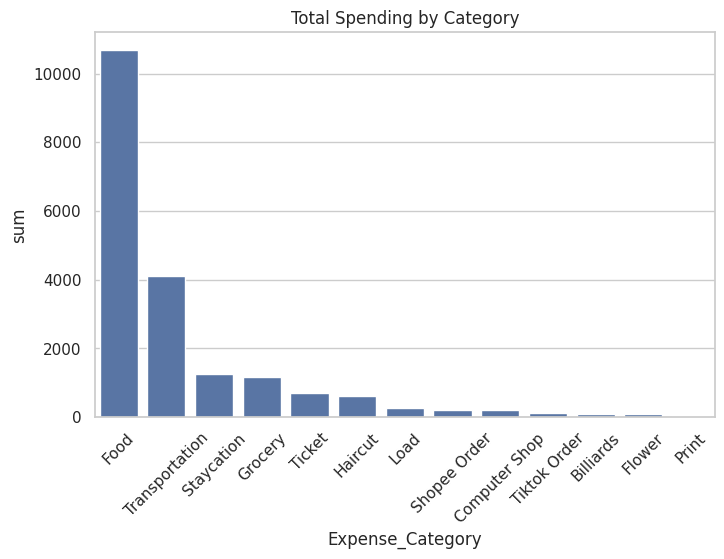

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=category_summary.index,
    y=category_summary['sum']
)
plt.xticks(rotation=45)
plt.title("Total Spending by Category")
plt.show()

# Variability Plot

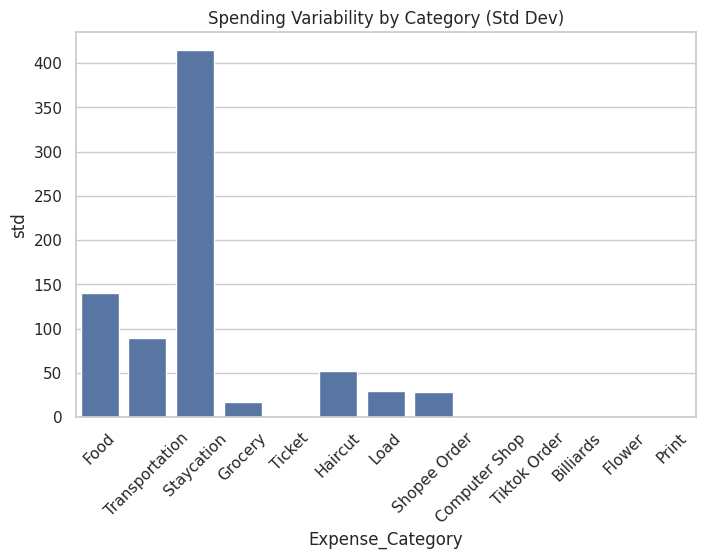

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=category_summary.index,
    y=category_summary['std']
)
plt.xticks(rotation=45)
plt.title("Spending Variability by Category (Std Dev)")
plt.show()

In [ ]:
category_pivot = df.pivot_table(
    index='Date',
    columns='Expense_Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

# Correlation Matrix

In [ ]:
correlation_matrix = category_pivot.corr()
correlation_matrix

Expense_Category,Billiards,Computer Shop,Flower,Food,Grocery,Haircut,Load,Print,Shopee Order,Staycation,Ticket,Tiktok Order,Transportation
Expense_Category,,,,,,,,,,,,,
Billiards,1.000000,-0.030542,-0.014925,-0.031201,-0.021262,-0.025647,-0.030903,-0.014925,-0.024937,-0.019259,-0.014925,-0.014925,0.093739
Computer Shop,-0.030542,1.000000,-0.030542,0.025128,-0.043509,-0.052482,-0.063239,-0.030542,-0.051029,-0.039411,-0.030542,-0.030542,-0.059996
Flower,-0.014925,-0.030542,1.000000,0.054916,-0.021262,-0.025647,-0.030903,-0.014925,-0.024937,-0.019259,-0.014925,-0.014925,0.117040
Food,-0.031201,0.025128,0.054916,1.000000,0.082041,0.078573,-0.142707,-0.085236,-0.159705,-0.093250,0.081933,-0.132516,0.112280
Grocery,-0.021262,-0.043509,-0.021262,0.082041,1.000000,-0.036535,-0.044024,-0.021262,-0.035524,0.639757,-0.021262,-0.021262,-0.016131
Haircut,-0.025647,-0.052482,-0.025647,0.078573,-0.036535,1.000000,-0.053102,-0.025647,-0.042849,-0.033094,-0.025647,-0.025647,0.021229
Load,-0.030903,-0.063239,-0.030903,-0.142707,-0.044024,-0.053102,1.000000,0.416692,-0.051632,-0.039877,-0.030903,-0.030903,-0.084376
Print,-0.014925,-0.030542,-0.014925,-0.085236,-0.021262,-0.025647,0.416692,1.000000,-0.024937,-0.019259,-0.014925,-0.014925,-0.032960
Shopee Order,-0.024937,-0.051029,-0.024937,-0.159705,-0.035524,-0.042849,-0.051632,-0.024937,1.000000,-0.032178,-0.024937,-0.024937,-0.147527


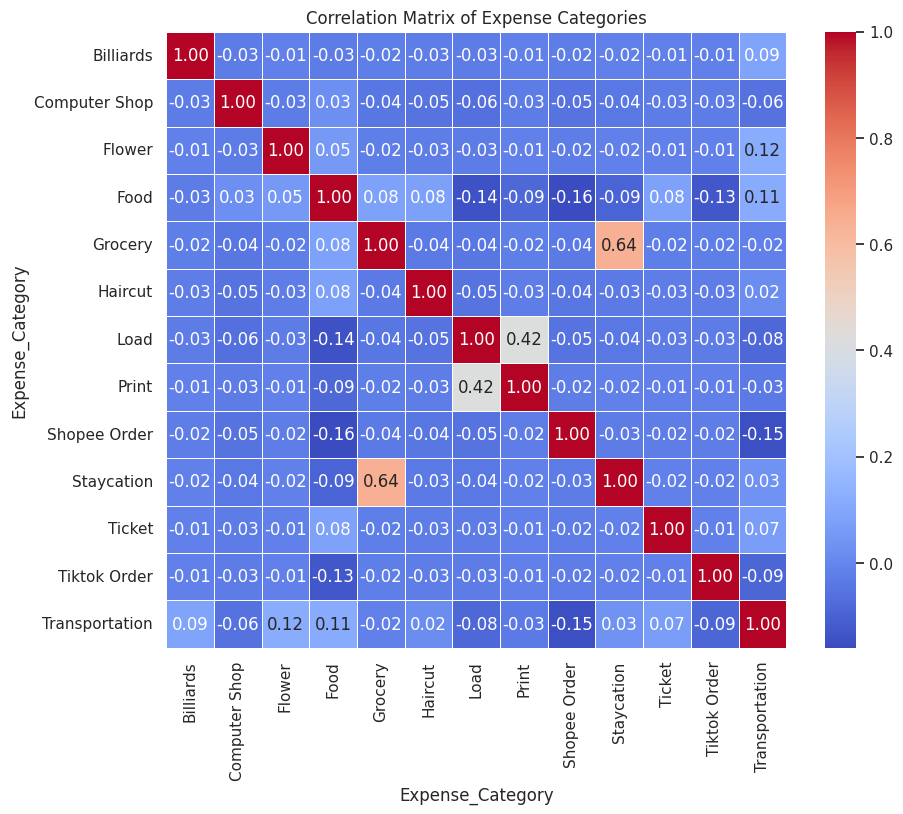

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Expense Categories")
plt.show()